In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
from __future__ import division

from pandas_datareader.data import DataReader

In [17]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']


end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [18]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,137.892342,135.159682,136.505001,136.593849,8.984527e+07,136.142888
std,10.854385,10.877661,10.827870,10.900506,2.875166e+07,11.059421
min,117.489998,116.209999,116.570000,116.360001,4.100000e+07,115.819870
25%,128.142502,125.940002,127.004997,127.049999,6.937820e+07,126.513033
50%,135.650002,133.454994,134.885002,134.464996,8.525580e+07,133.840828
75%,147.802494,145.577499,146.352505,146.587502,1.048418e+08,146.336533
max,165.699997,161.000000,161.679993,161.940002,1.925415e+08,161.940002


In [19]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-11-27 to 2021-11-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

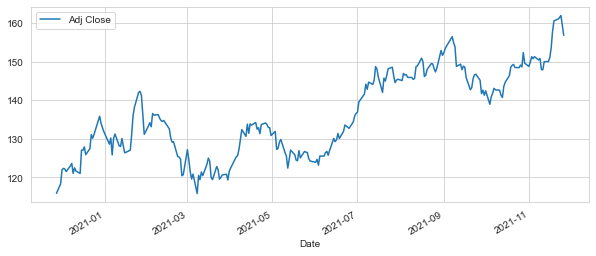

In [20]:
AAPL['Adj Close'].plot(legend = True,figsize = (10,4))

<AxesSubplot:xlabel='Date'>

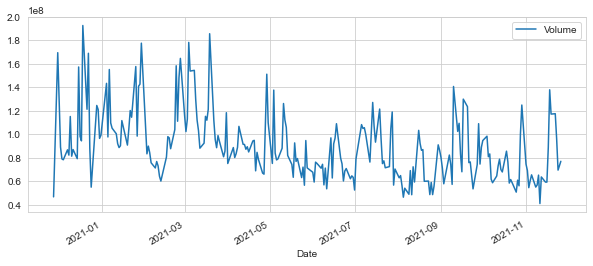

In [21]:
AAPL['Volume'].plot(legend = True,figsize = (10,4))

In [24]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' % (str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

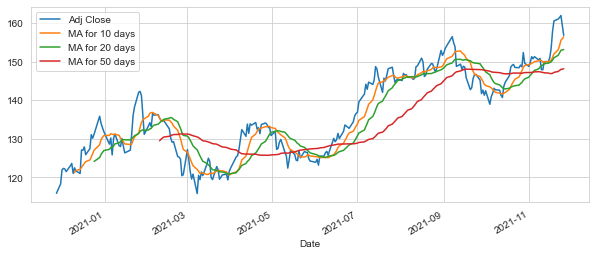

In [28]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False,figsize = (10,4))

<AxesSubplot:xlabel='Date'>

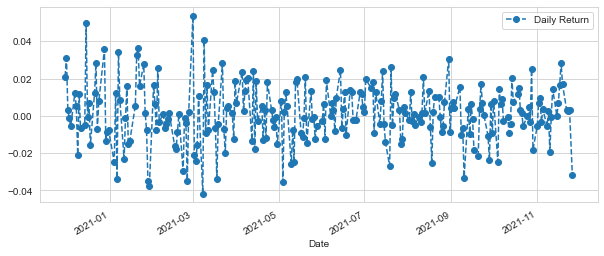

In [31]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize = (10,4),legend = True,linestyle = '--',marker = 'o')

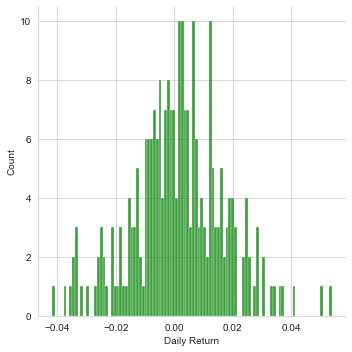

In [33]:
sns.displot(AAPL['Daily Return'].dropna(),bins = 100,color = 'green')

<AxesSubplot:>

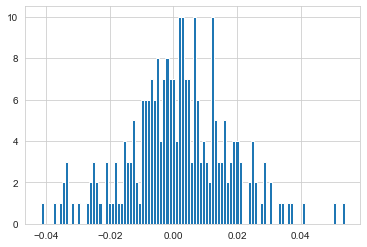

In [35]:
AAPL['Daily Return'].hist(bins = 100)

In [36]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [37]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-27,115.875641,1793.189941,213.440872,3195.340088
2020-11-30,118.320580,1760.739990,212.290512,3168.040039
2020-12-01,121.968094,1798.099976,214.412735,3220.080078
2020-12-02,122.325890,1827.949951,213.579712,3203.530029
2020-12-03,122.186745,1826.770020,212.459106,3186.729980


In [38]:
tech_rets = closing_df.pct_change()

In [39]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-27,NaN,NaN,NaN,NaN
2020-11-30,0.021100,-0.018096,-0.005390,-0.008544
2020-12-01,0.030827,0.021218,0.009997,0.016427
2020-12-02,0.002934,0.016601,-0.003885,-0.005140
2020-12-03,-0.001137,-0.000645,-0.005247,-0.005244


E:\Anaconda\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


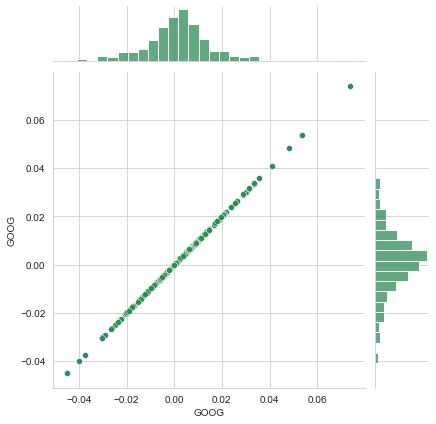

In [44]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter',color = 'seagreen')

E:\Anaconda\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


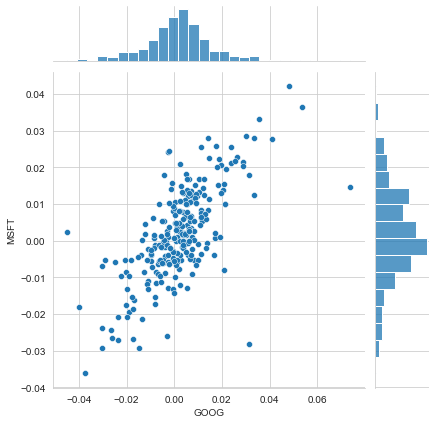

In [45]:
sns.jointplot('GOOG','MSFT',tech_rets,kind = 'scatter')

In [46]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-27,NaN,NaN,NaN,NaN
2020-11-30,0.021100,-0.018096,-0.005390,-0.008544
2020-12-01,0.030827,0.021218,0.009997,0.016427
2020-12-02,0.002934,0.016601,-0.003885,-0.005140
2020-12-03,-0.001137,-0.000645,-0.005247,-0.005244


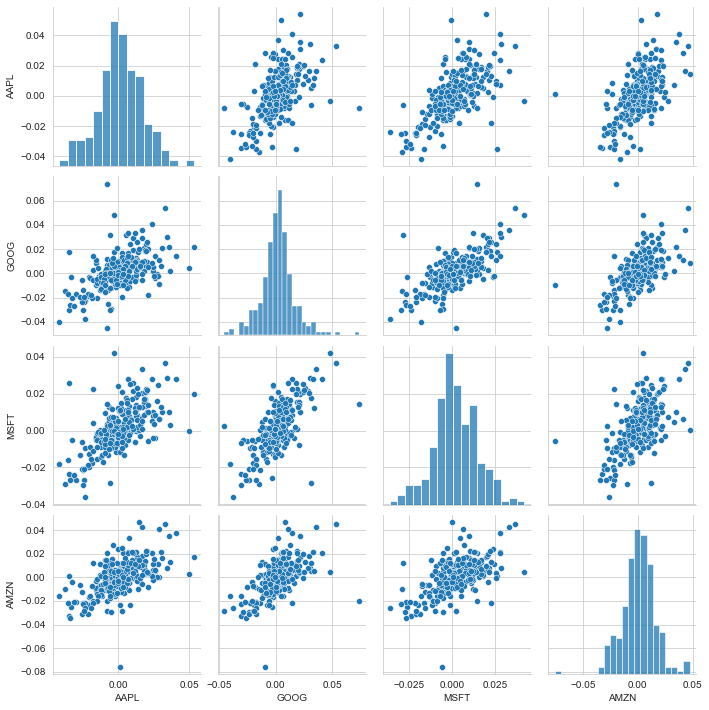

In [53]:
sns.pairplot(tech_rets.dropna())

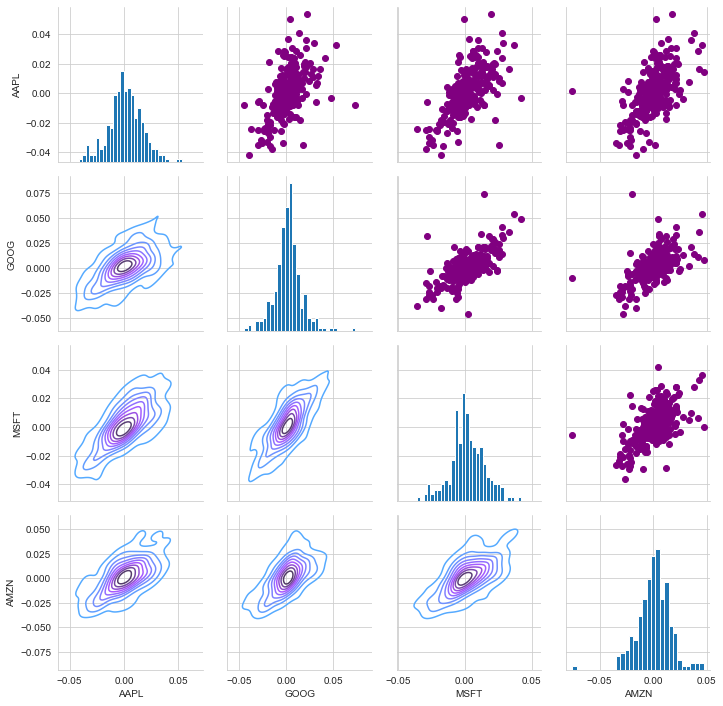

In [54]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color = 'purple')

returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')

returns_fig.map_diag(plt.hist,bins = 30)

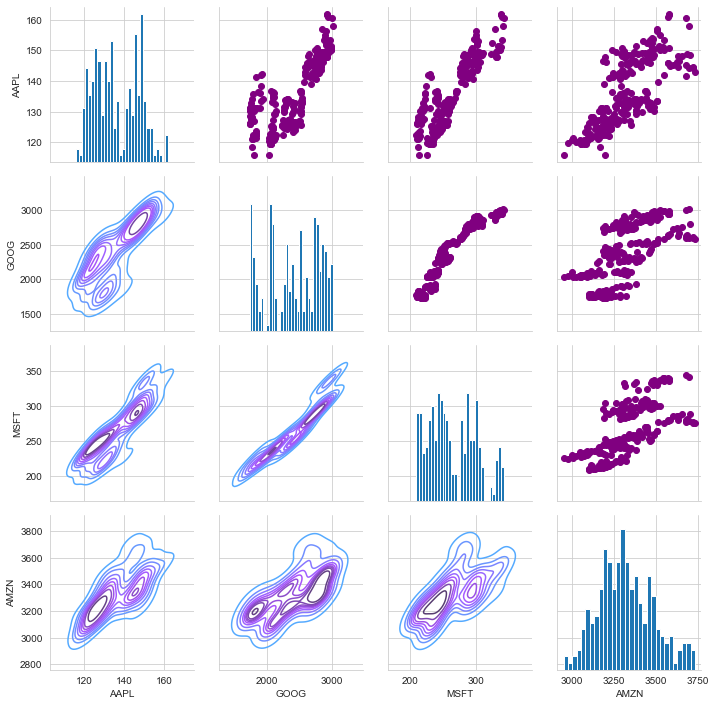

In [55]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color = 'purple')

returns_fig.map_lower(sns.kdeplot,cmap = 'cool_d')

returns_fig.map_diag(plt.hist,bins = 30)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

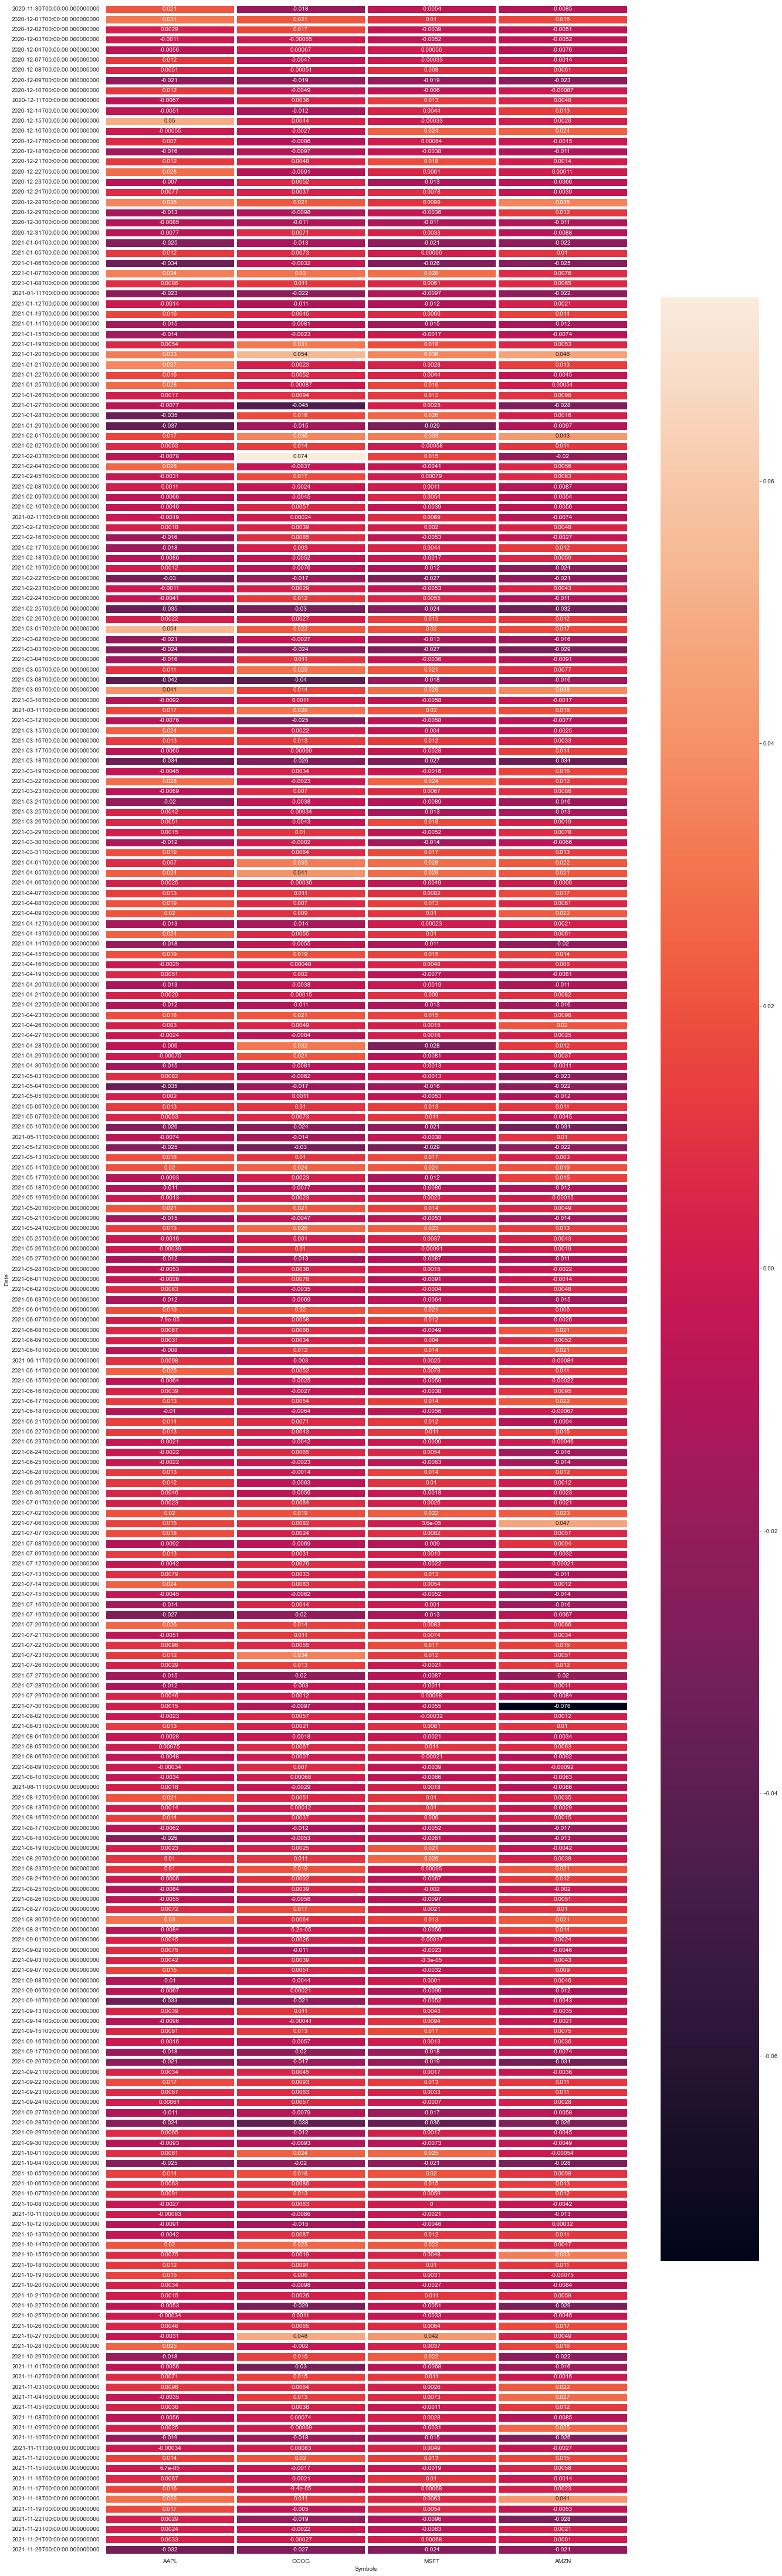

In [59]:
fig, ax = plt.subplots(figsize = (20,80))
sns.heatmap(tech_rets.dropna(),annot = True,linewidth = 5,ax = ax)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

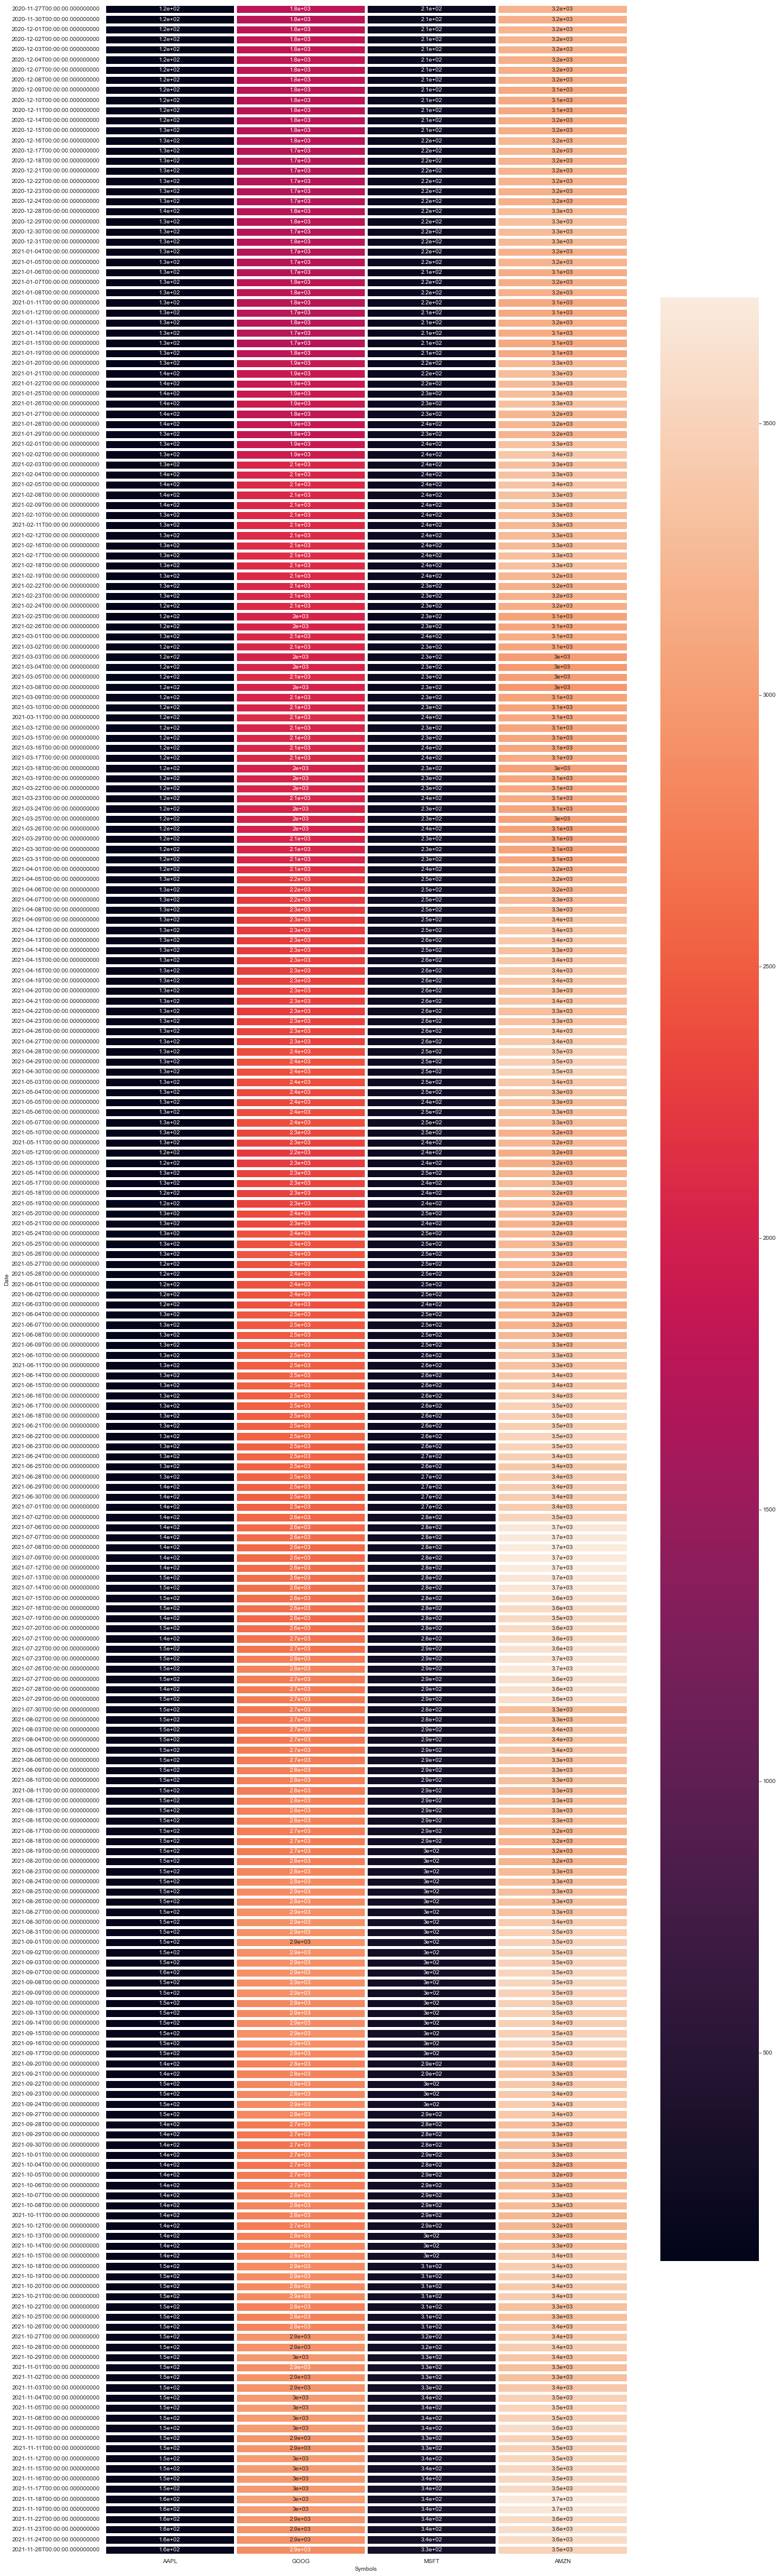

In [61]:
fig, ax = plt.subplots(figsize = (20,80))
sns.heatmap(closing_df,annot = True,linewidth = 5,ax = ax)

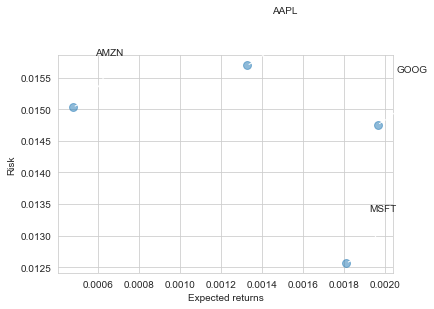

In [74]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),alpha = 0.5,s = area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label,x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x, y),xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-',connectionstyle = 'arc3,rad = -0.3'))

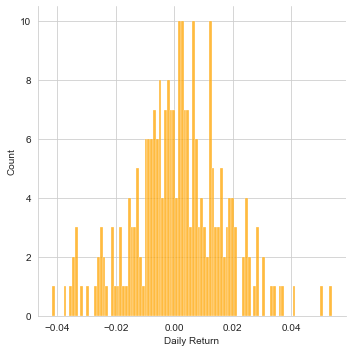

In [75]:
sns.displot(AAPL['Daily Return'].dropna(),bins = 100,color = 'orange')

In [79]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-30,0.021100,-0.018096,-0.005390,-0.008544
2020-12-01,0.030827,0.021218,0.009997,0.016427
2020-12-02,0.002934,0.016601,-0.003885,-0.005140
2020-12-03,-0.001137,-0.000645,-0.005247,-0.005244
2020-12-04,-0.005613,0.000668,0.000560,-0.007578


In [78]:
rets['AAPL'].quantile(0.05)

-0.025219801489153038

In [81]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [89]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x]+ shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

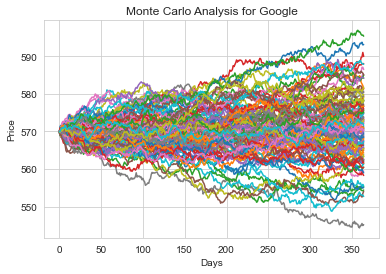

In [90]:
start_price = 569.85


for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [93]:
runs = 10000


simulations = np.zeros(runs)

np.set_printoptions(threshold = 5)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

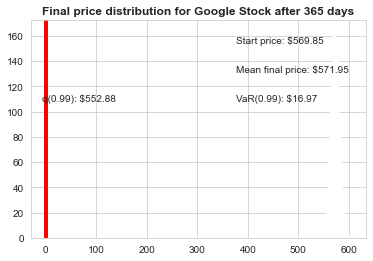

In [97]:
q = np.percentile(simulations, 1)

plt.hist(simulations,bins = 200)

plt.figtext(0.6,0.8,s = 'Start price: $%.2f' %start_price)

plt.figtext(0.6,0.7,'Mean final price: $%.2f' % simulations.mean())

plt.figtext(0.6,0.6, 'VaR(0.99): $%.2f' % (start_price - q,))

plt.figtext(0.15,0.6,'q(0.99): $%.2f' % q)

plt.axvline(x=1,linewidth = 4, color = 'r')

plt.title(u'Final price distribution for Google Stock after %s days' % days, weight = 'bold')